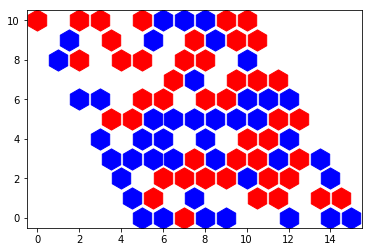

GANO JUGADOR 2
[110, 111, 99, 88, 78, 79, 69, 59, 60, 71, 82, 61, 62, 63, 53, 54, 52, 58, 80, 68, 77, 66]


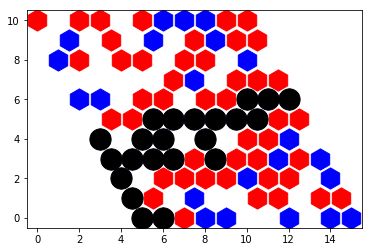

In [1]:
%matplotlib inline
import time
import random
import pylab as pl
from IPython import display
from itertools import compress
import numpy as np

#Tamaño del tamblero
tam = 11
#Colores de los jugadores
colors = ['white','red','blue',]
gano = [False,False]
inicialesJug1 = [i for i in range(0,tam)]
finalesJug1 = [i for i in range(tam**2-tam,tam**2)]
finalesJug2 = [i for i in range(tam-1,tam**2,tam)]
inicialesJug2 = [i for i in range(0,tam**2,tam)]

#Inicialización de la malla
x = list(range(0,tam))
for i in range(tam-1):
    x_aux = x[-tam:]
    for j in range(tam):
        x_aux[j] += 0.5
    x = x + x_aux
y = []
cont = tam-1
for i in range(tam):
    for j in range(tam):
        y = y + [cont]
    cont -= 1

#Parametros de la grafica
xmax = tam-1 + tam/2
xmin = -0.5
ymax = tam-1 + 0.5
ymin = -0.5
pl.xlim(xmin, xmax)
pl.ylim(ymin, ymax)

#Tamaño de los hexagonos
size = (11/tam)**(2)

#Inicialización del estado
estado = [[0]*tam for i in range(tam)]
estadoM = np.array(estado)
accionEj = [3,5] #Ejemplo de forma de la accion de salida del agente que pone una ficha en la fila 2 y columna 4

#Clase tablero usada para saber cuando algun jugador gana
class EstadoJugador:
    def __init__(self,name,n):
        self.name = name
        self.grafo = np.zeros((n*n,n*n))
        self.n = n
    def Adyacentes(self,posX,posY):
        deltaX = [1,-1,0,1,-1,0]
        deltaY =[0,0,-1,-1,1,1]
        adyaX = []
        adyaY = []
        for i in range(6):
            auxX = posX + deltaX[i]
            auxY = posY + deltaY[i]
            if (0 <= auxX < self.n) & (0 <= auxY < self.n):
                adyaX += [auxX]
                adyaY += [auxY]
            else:
                pass
        adya = set()
        for i in range(len(adyaX)):
            adyaAbs = Pos2Dto1D(adyaX[i],adyaY[i],self.n)
            adya.add(adyaAbs)
        return adya
    def ActualizarGrafo(self,accion):
        adya = self.Adyacentes(accion[0],accion[1])
        for nodo in adya:
            self.grafo[Pos2Dto1D(accion[0],accion[1],self.n),nodo] += 1
            self.grafo[nodo,Pos2Dto1D(accion[0],accion[1],self.n)] += 1
    def VerEstado(self):
        print(self.grafo)
    def VerFila(self,fila):
        print(self.grafo[fila,:])
    def DFS(self,init):
        fringe = [init]
        visitados = []
        while len(fringe):
            actual = fringe.pop()
            vecinos = np.where(self.grafo[actual,:] == 2)[0]
            fringe += list(set(vecinos)-set(visitados)-set(fringe))
            visitados += [actual]
        return visitados
    def Win(self,ini,fin):
        win = False
        while len(ini):
            actual = ini.pop()
            visitados = self.DFS(actual)
            if set(visitados) & set(fin):
                win = visitados
                break
            ini = list(set(ini) - set(visitados))
        return win
    
def Pos2Dto1D(posX,posY,n):
    #pos inicia en 0
    pos1D = posX*n+posY
    return pos1D
def Pos1Dto2D(pos,n):
    indices = np.unravel_index(pos, (n,n))
    return indices
def UnoPorDim(mat,dim):
    maximos = mat.max(axis=dim)
    if np.sum(maximos) == tam:
        return True
    else:
        return False

#Cambio de los indices a 2D
ini2D1 = Pos1Dto2D(inicialesJug1,tam)
ini2D2 = Pos1Dto2D(inicialesJug2,tam)
fin2D1 = Pos1Dto2D(finalesJug1,tam)
fin2D2 = Pos1Dto2D(finalesJug2,tam)
    

lugares = np.random.permutation(tam**2) #para la visualizacion sin angentes y que no se repitan posiciones
#Ciclo general del juego, debera ser un while mientras nadie haya ganado o 121 iteraciones
jugadorActual = 1 #inicializacion del jugador
tableroJug1 = EstadoJugador("1",tam)
tableroJug2 = EstadoJugador("2",tam)
for i in range(tam**2):

    #ASI VA A SER COMO SE LLAMA AL AGENTE DE CADA UNO
    if jugadorActual == 1:
        #####!! accion = Agente_Nombre1_Nombre2(estado,jugadorActual)
         #Para efectos del ejemplo genera una accion aleatoria, esta puede repetir lugar porque esta comentada la parte que lo chequea
        accionEj = Pos1Dto2D(lugares[i],tam)
        tableroJug1.ActualizarGrafo(accionEj)
    else:
        #####!! accion = Agente_Nombre3_Nombre4(estado,jugadorActual)
         #Para efectos del ejemplo genera una accion aleatoria, esta puede repetir lugar porque esta comentada la parte que lo chequea
        accionEj = Pos1Dto2D(lugares[i],tam)
        tableroJug2.ActualizarGrafo(accionEj)
    
    
    #Actualizacion del estado del tablero
    if estado[accionEj[0]][accionEj[1]] == 0:
        estado[accionEj[0]][accionEj[1]] = jugadorActual
        estadoM[accionEj[0],accionEj[1]] = jugadorActual
            #Actualizacion del grafico
        #pl.scatter(x[accionEj[0]+11*accionEj[1]],y[accionEj[0]+11*accionEj[1]], marker='h', s=size*450, color=colors[jugadorActual])
        pl.scatter(x[lugares[i]],y[lugares[i]], marker='h', s=size*450, color=colors[jugadorActual])
        display.clear_output(wait=True)
        display.display(pl.gcf())    
    else:
        print('ERROR ficha donde ya habia')
        break

    #ACA SE CHEQUEARIA SI ALGUIEN GANO
    if UnoPorDim(estadoM==jugadorActual,jugadorActual%2):
        if jugadorActual == 1:
            #tableroJug1.VerFila(0)
            #tableroJug1.VerEstado()
            presentes = list(compress(inicialesJug1,estadoM[ini2D1]==1))
            gano[0] = tableroJug1.Win(presentes,finalesJug1)
            if gano[0]:
                print("GANO JUGADOR 1")
                print(gano[0])
                for i in gano[0]:
                    pl.scatter(x[i],y[i], marker='o', s=size*450, color='orange')
                break
        else:
            presentes = list(compress(inicialesJug2,estadoM[ini2D2]==2))
            gano[1] = tableroJug2.Win(presentes,finalesJug2)
            if gano[1]:
                print("GANO JUGADOR 2")
                print(gano[1])
                for i in gano[1]:
                    pl.scatter(x[i],y[i], marker='o', s=size*450, color='black')
                break
    

    #Cambio de jugados
    if (i+1)%2 == 0:
        jugadorActual = 2
    else:
        jugadorActual = 1
   

In [245]:
start = time.time()
cont = 0
for i in range(0,1000000):
    cont += 1
end = time.time()
print(end - start)

0.14173316955566406
